<a href="https://colab.research.google.com/github/Bob3110/CodeAlpha-projects/blob/main/Task_1_Titanic_code_alpha_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')

# **Loading Datasets**

In [94]:
df=pd.read_csv("/content/train.csv")

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Inspection and Cleaning**

In [96]:
#Data types of the columns
print("Data type of each column")
print(df.dtypes)

Data type of each column
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [97]:
#Check for missing values
print("Missing values in each column")
print(df.isnull().sum())

Missing values in each column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [98]:
#Handling the missing values
print("Missing values in {'Cabin'}:")
print(df['Cabin'].isna().sum())

df.dropna(subset=['Cabin'],inplace=True)

print("Missing values in {'Cabin'}:")
print(df['Cabin'].isna().sum())

print("Missing values in {'Age'}:")
print(df['Age'].isna().sum())

df['Age'].fillna(df['Age'].mean(),inplace=True)

print("Missing values in {'Age'}:")
print(df['Age'].isna().sum())

print("Missing values in {'Embarked'}:")
print(df['Embarked'].isna().sum())

df.dropna(subset=['Embarked'],inplace=True)

print("Missing values in {'Embarked'}:")
print(df['Embarked'].isna().sum())

Missing values in {'Cabin'}:
687
Missing values in {'Cabin'}:
0
Missing values in {'Age'}:
19
Missing values in {'Age'}:
0
Missing values in {'Embarked'}:
2
Missing values in {'Embarked'}:
0


In [99]:
#Check for missing values after handling missing values
print("Missing values in each column")
print(df.isnull().sum())

Missing values in each column
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


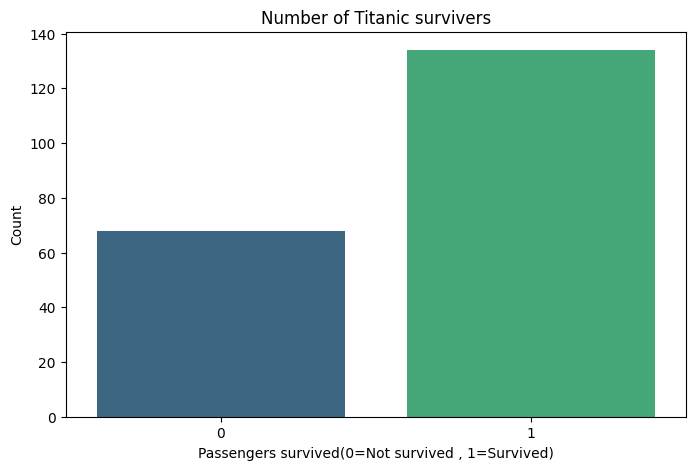

In [100]:
#Plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=df['Survived'].value_counts().index, y=df['Survived'].value_counts().values, palette="viridis")
plt.title("Number of Titanic survivers")
plt.xlabel("Passengers survived(0=Not survived , 1=Survived)")
plt.ylabel("Count")
plt.show()

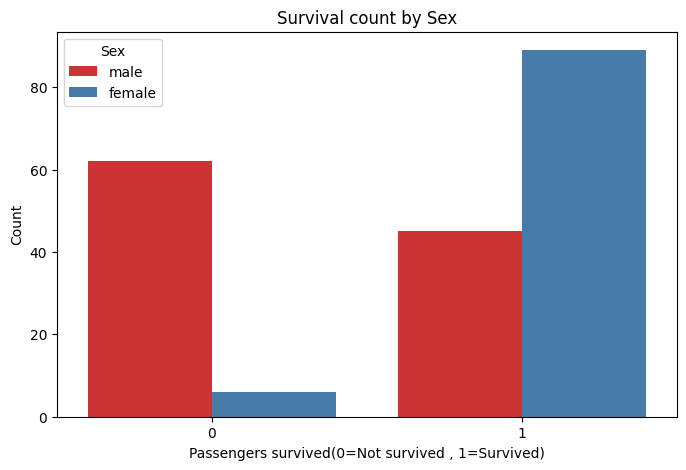

In [101]:
#Plot a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=df, palette="Set1")
plt.title("Survival count by Sex")
plt.xlabel("Passengers survived(0=Not survived , 1=Survived)")
plt.ylabel("Count")
plt.show()

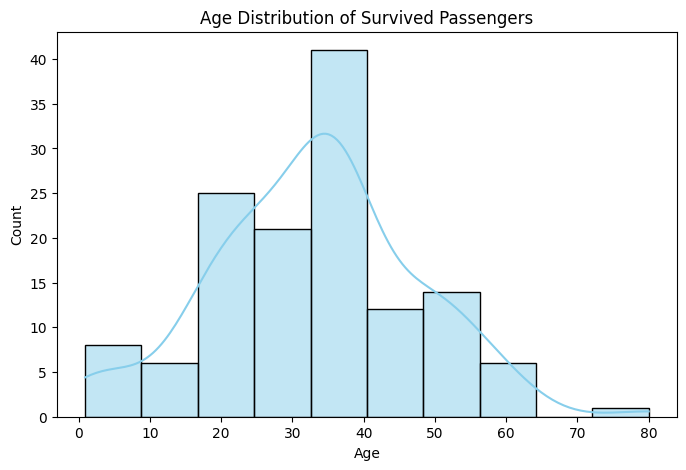

In [102]:
#Plot a histogram
plt.figure(figsize=(8,5))
sns.histplot(data=df[df['Survived']==1], x='Age', bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Survived Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

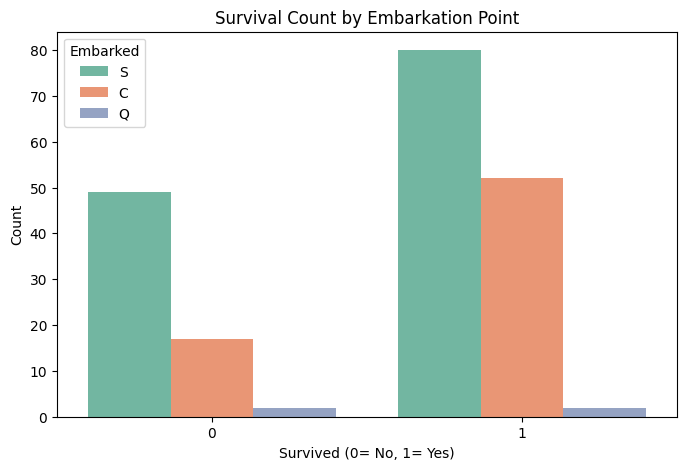

In [103]:
#Plot a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Embarked', data=df, palette="Set2")
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Survived (0= No, 1= Yes)")
plt.ylabel("Count")
plt.legend(title="Embarked", loc="upper left")
plt.show()

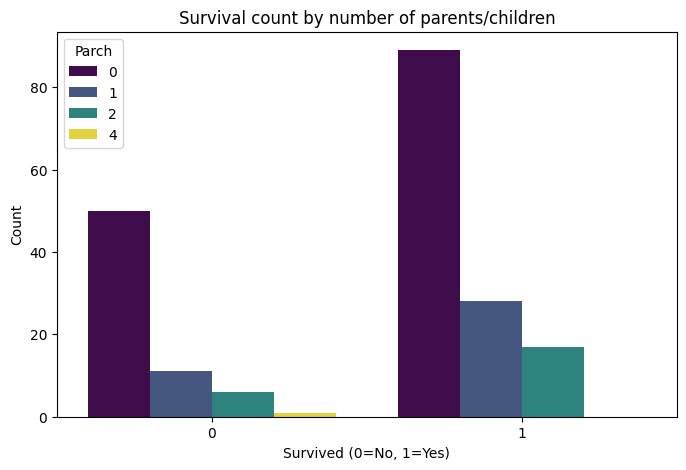

In [104]:
#Plot a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Parch', data=df, palette="viridis")
plt.title("Survival count by number of parents/children")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Parch" , loc="upper left")
plt.show()

# **Data Pre-processing**

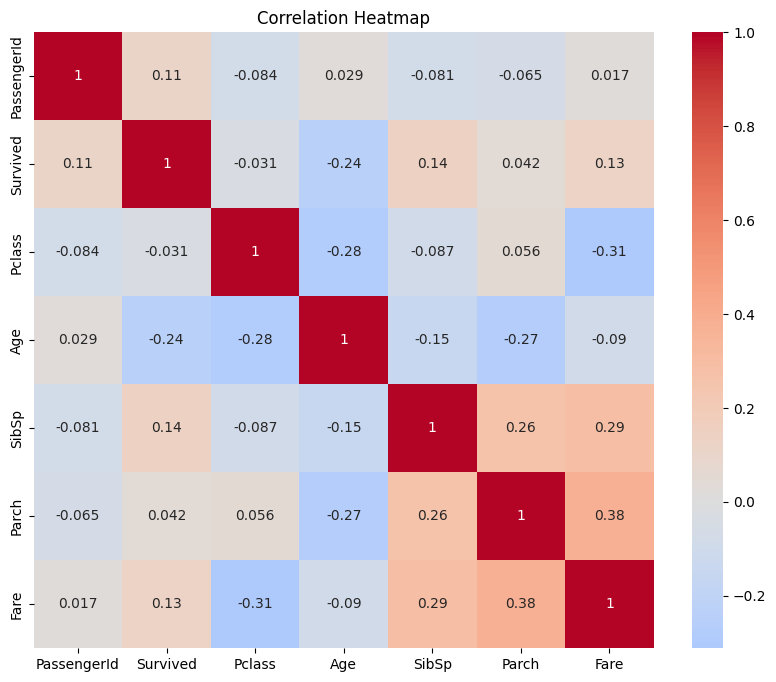

In [105]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [106]:
#Drop uneeded columns
df.drop(['Name','Pclass','Age','Cabin','PassengerId','Ticket'],axis=1,inplace=True)

In [107]:
#Identifying the categorical columns
print("Categorical Columns:")
print(df.select_dtypes(include=['object']).columns)

#One-hot encoding for categorical columns
df_encode=pd.get_dummies(data=df,columns=df.select_dtypes(include=['object']).columns,drop_first=True,dtype='int8')

Categorical Columns:
Index(['Sex', 'Embarked'], dtype='object')


In [108]:
#Identify numerical columns
print("Numerical columns:")
print((df.select_dtypes(include=['int64','float64']).columns))

#Create a MinMaxScaler
scaler=MinMaxScaler()

#Normalize numerical columns using Min-Max Scaling
df[(df.select_dtypes(include=['int64','float64']).columns)]=scaler.fit_transform(df[(df.select_dtypes(include=['int64','float64']).columns)])

df.head()

Numerical columns:
Index(['Survived', 'SibSp', 'Parch', 'Fare'], dtype='object')


,Survived,Sex,SibSp,Parch,Fare,Embarked
1,1.0,female,0.333333,0.00,0.139136,C
3,1.0,female,0.333333,0.00,0.103644,S
6,0.0,male,0.000000,0.00,0.101229,S
10,1.0,female,0.333333,0.25,0.032596,S
11,1.0,female,0.000000,0.00,0.051822,S


# **Modelling**

In [117]:
#Perform one-hot encooding for 'Sex' column
df_encoded=pd.get_dummies(df, columns=['Sex','Embarked'], prefix=['Sex','Embarked'])

#Define X and Y
X=df_encoded.drop('Survived',axis=1)
Y=df_encoded['Survived']

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model=LogisticRegression(random_state=42)

#Train the model
model.fit(X_train, Y_train)

#Predictions on the test data
predictions=model.predict(X_test)

#Evaluate the model
print("Accuracy:")
print(accuracy_score(Y_test,predictions))

#Classification report
print("Classification report:")
print(classification_report(Y_test, predictions, zero_division=1))

Accuracy:
0.7804878048780488
Classification report:
              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64         8
         1.0       1.00      0.73      0.84        33

    accuracy                           0.78        41
   macro avg       0.74      0.86      0.74        41
weighted avg       0.90      0.78      0.80        41

